# (2) 2.3: Complex Machine Learning Models and Keras Part 2

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree

import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
path = r'C:\Users\nvak6\Machine Learning with Python'
pleasant = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))
X = pd.read_csv(os.path.join(path, 'weather_cleaned.csv'), index_col=False)

### Data Wrangling for Heathrow
- We only want the Heathrow Station

In [6]:
# Create a list of the columns containing "Heathrow" in their names
heathrow_list = list(x for x in X.columns if x.find('HEATHROW') >=0)
heathrow_list

['HEATHROW_cloud_cover',
 'HEATHROW_humidity',
 'HEATHROW_pressure',
 'HEATHROW_global_radiation',
 'HEATHROW_precipitation',
 'HEATHROW_sunshine',
 'HEATHROW_temp_mean',
 'HEATHROW_temp_min',
 'HEATHROW_temp_max']

In [7]:
# Create a dataframe with those columns
df_heathrow = X[heathrow_list]
df_heathrow

,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max
0,7,0.91,1.0010,0.13,0.22,0.0,10.6,9.4,8.3
1,7,0.98,1.0051,0.13,0.23,0.0,6.1,3.9,10.6
2,8,0.96,1.0166,0.15,0.07,0.1,8.4,6.1,12.2
3,8,0.98,1.0230,0.13,0.00,0.0,9.4,6.7,8.9
4,5,0.84,1.0275,0.30,0.00,2.1,8.9,8.9,7.2
...,...,...,...,...,...,...,...,...,...
22945,5,0.87,1.0140,1.18,0.16,1.9,16.4,11.9,18.9
22946,4,0.82,1.0152,1.18,0.16,4.2,15.8,12.7,21.8
22947,7,0.85,1.0138,1.18,0.16,4.2,16.5,11.2,17.0
22948,5,0.86,1.0147,1.18,0.16,0.6,15.2,13.4,17.5


In [8]:
# Reduce answers dataset to Heathrow's answers only
pleasant_heathrow = pleasant['HEATHROW_pleasant_weather']
pleasant_heathrow

0        0
1        0
2        0
3        0
4        0
        ..
22945    0
22946    0
22947    0
22948    0
22949    0
Name: HEATHROW_pleasant_weather, Length: 22950, dtype: int64

### Reshaping to fit the Model

In [10]:
X2 = df_heathrow
y2 = pleasant_heathrow

In [11]:
# Turn X2 and y2 from df to arrays
X = np.array(X2)
y = np.array(y2)

### Spliting the Data

In [13]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [14]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


### Random Forest Model

In [16]:
# Create a RF classifier
clf = RandomForestClassifier(n_estimators = 100)#, max_depth=5)  

In [17]:
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [18]:
# Perform predictions on the test dataset
y_pred = clf.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  1.0


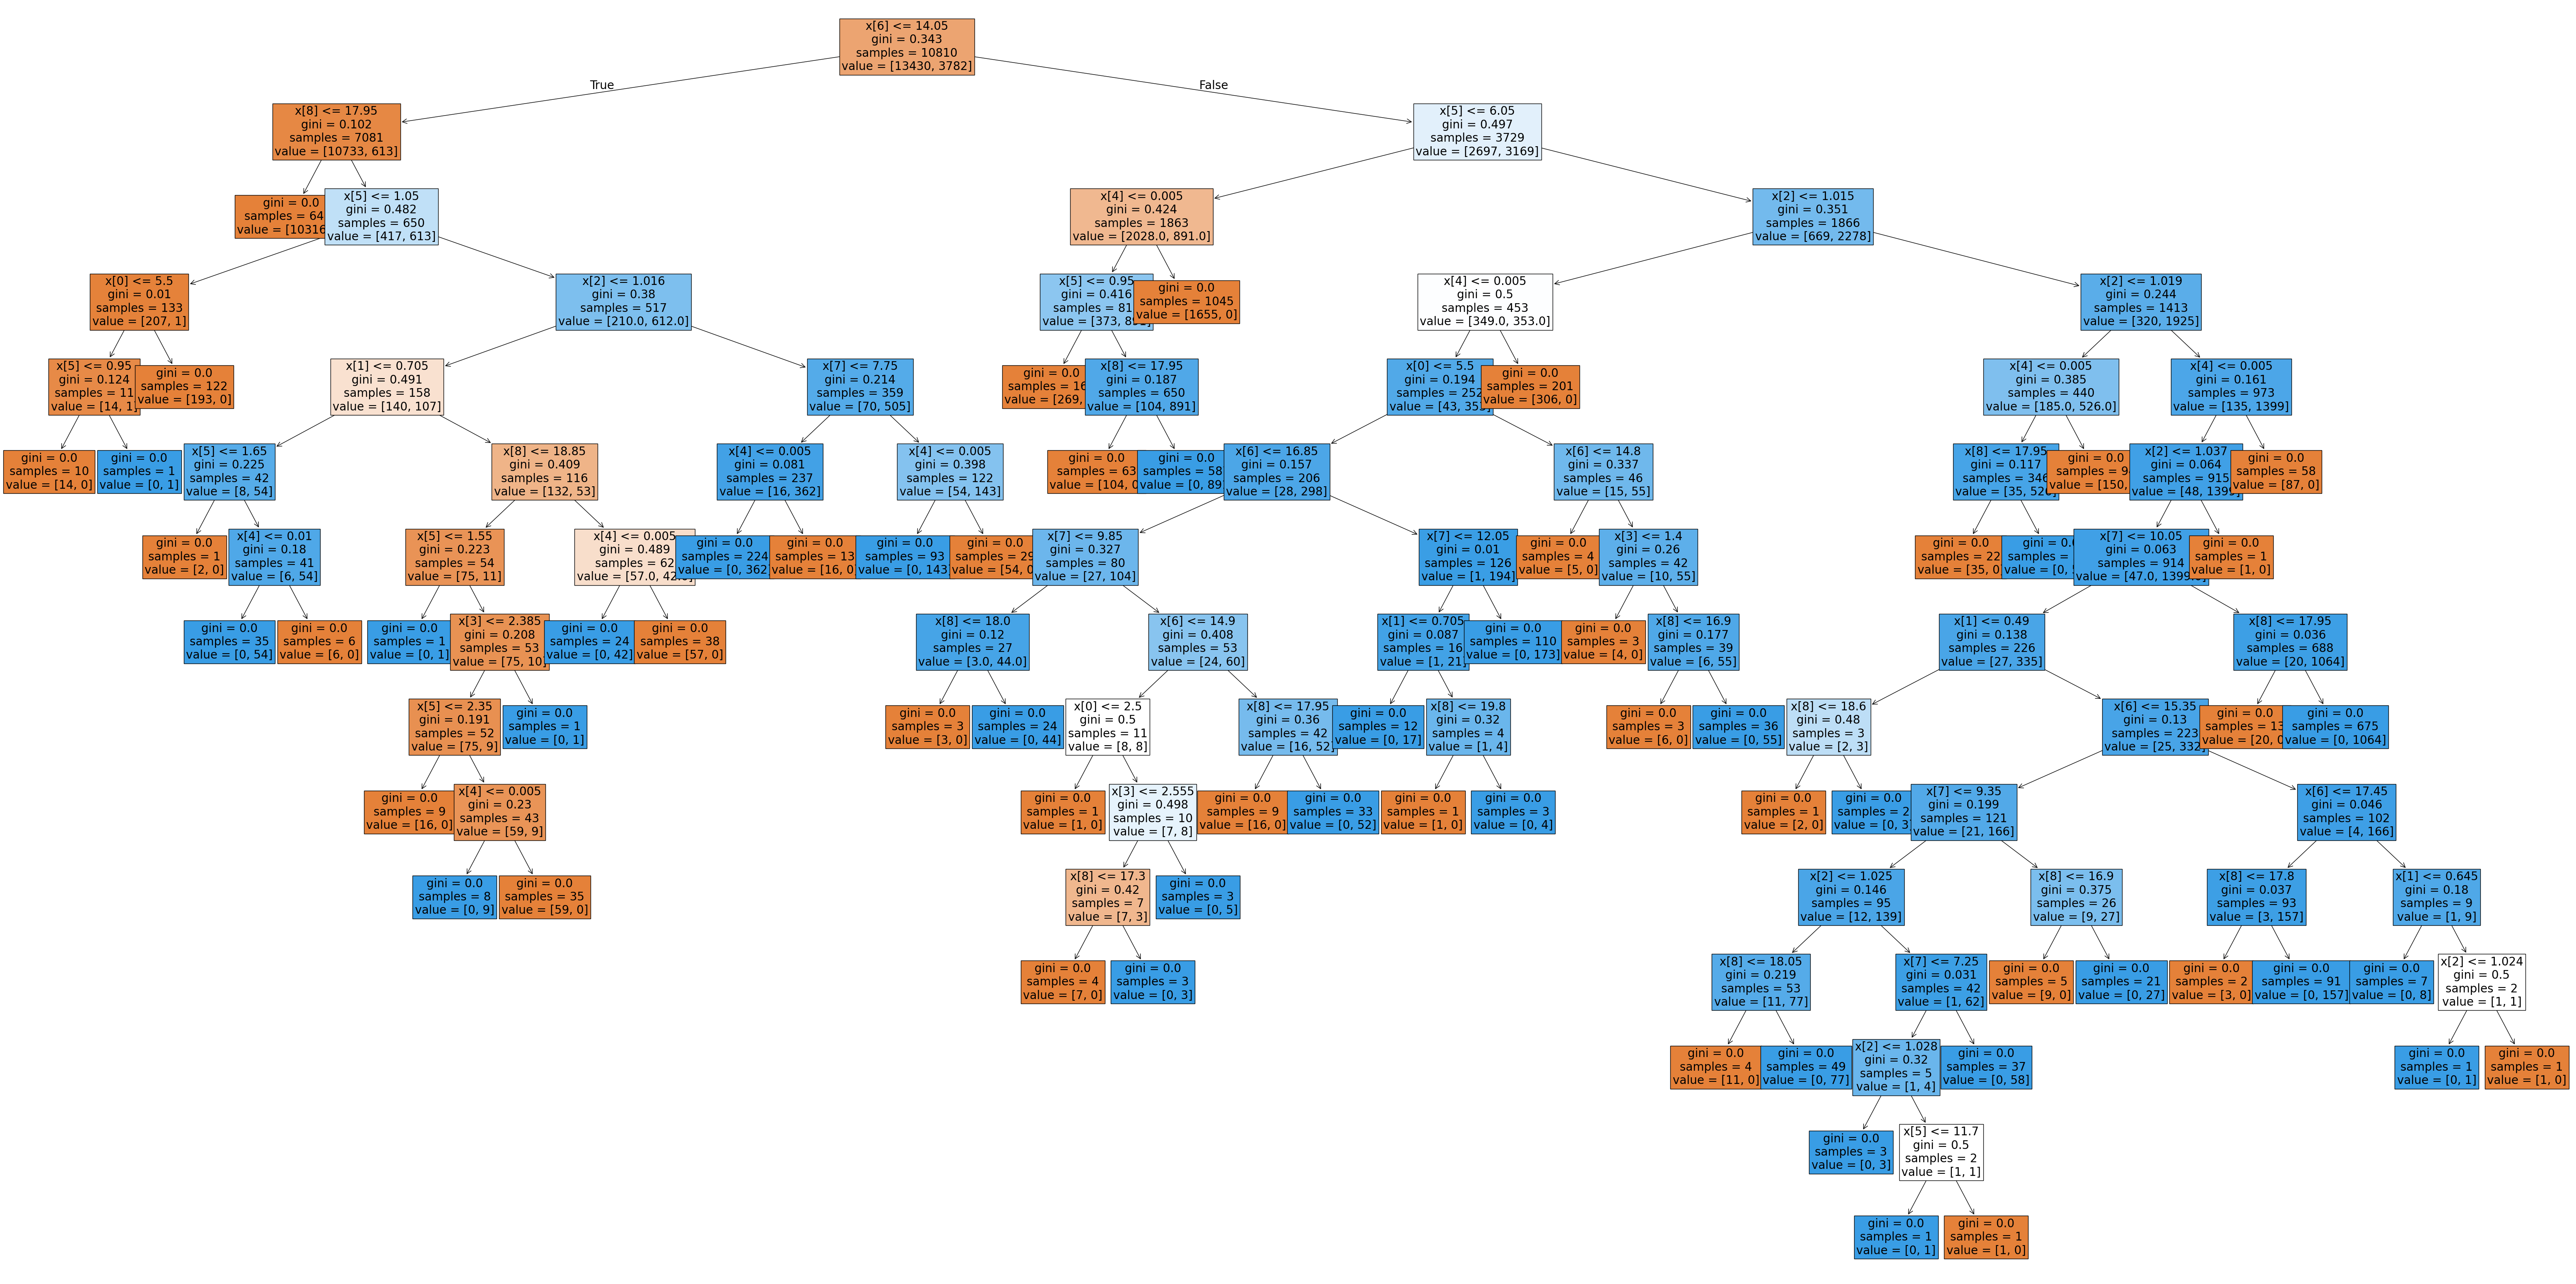

In [19]:
# Class-names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}
fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[6], fontsize = 20, filled=True);

In [20]:
fig.savefig(os.path.join(path,'random_forest_Heathrow.png'),bbox_inches='tight')

### Important Features

In [22]:
# Retrieve feature importances from the trained model
newarray = clf.feature_importances_
print(clf.feature_importances_.shape)
newarray

(9,)


array([0.00974696, 0.03387697, 0.01664321, 0.07394074, 0.31544355,
       0.07700124, 0.13176417, 0.01967875, 0.32190441])

In [23]:
# Create a list of weather features
wx_list = [feature.replace('HEATHROW_', '') for feature in heathrow_list]
wx_list

['cloud_cover',
 'humidity',
 'pressure',
 'global_radiation',
 'precipitation',
 'sunshine',
 'temp_mean',
 'temp_min',
 'temp_max']

In [24]:
important = pd.Series(newarray, index = wx_list)
important

cloud_cover         0.009747
humidity            0.033877
pressure            0.016643
global_radiation    0.073941
precipitation       0.315444
sunshine            0.077001
temp_mean           0.131764
temp_min            0.019679
temp_max            0.321904
dtype: float64

['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


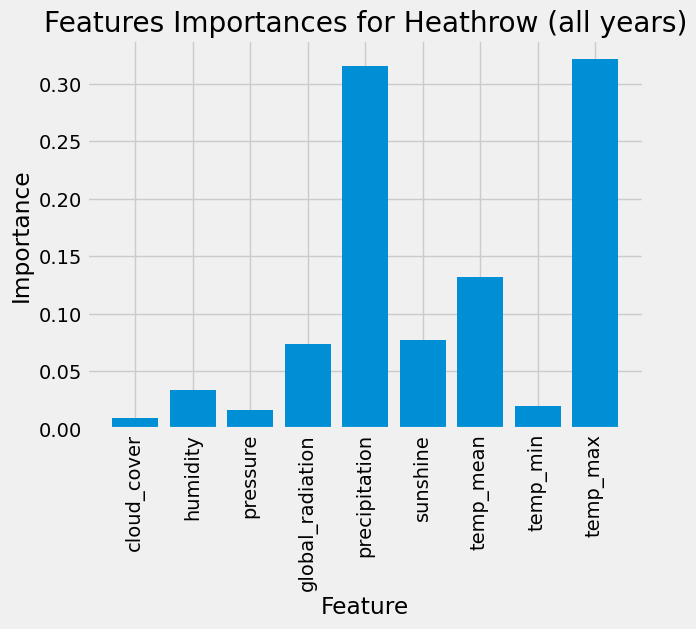

In [25]:
# Plot the results

%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(newarray)))
print(wx_list)

plt.bar(x_values, newarray, orientation = 'vertical')
plt.xticks(x_values, wx_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Features Importances for Heathrow (all years)');

plt.savefig(os.path.join(path, 'Heathrow_feature_importances.png'), bbox_inches='tight')
plt.show()